# EDA Steam Games Sales

### Table of content
 #### • [Data cleaning](#Data-cleaning)
#### • [Data summary](#Data-sumarry)
#### • [Data analysis](#Data-analysis)

In [323]:
%%capture
import warnings
warnings.filterwarnings('ignore', message='use_inf_as_na option is deprecated.*', category=FutureWarning)

In [324]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [325]:
df = pd.read_csv('DSGames/Games.csv')

## Data cleaning

In [326]:
df.rename(columns = {'Year_of_Release':'Year'}, inplace = True)
df.rename(columns = {'NA_Sales':'NA'}, inplace = True)
df.rename(columns = {'EU_Sales':'EU'}, inplace = True)
df.rename(columns = {'JP_Sales':'JP'}, inplace = True)
df.rename(columns = {'Other_Sales':'Other'}, inplace = True)
df.rename(columns = {'Global_Sales':'Global'}, inplace = True)

In [327]:
df = df.dropna(how='any', subset=['Platform','Year'])

In [328]:
for el in  ['Platform', 'Genre','Name']:
    df[el] = df[el].astype('string')
    df[el] = df[el].str.strip()
df['Year'] = df['Year'].astype('int64')
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

In [329]:
df.columns = df.columns.str.strip()

In [330]:
df.isnull().sum()

Name               2
Platform           0
Year               0
Genre              2
Publisher         32
NA                 0
EU                 0
JP                 0
Other              0
Global             0
Critic_Score    8467
Critic_Count    8467
User_Score      8987
User_Count      8987
Developer       6543
Rating          6681
dtype: int64

In [331]:
df.drop(df.index[659],inplace = True)
df.drop(df.index[14245],inplace = True)
df.dropna(axis = 0, inplace = True)

In [332]:
df.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA              0
EU              0
JP              0
Other           0
Global          0
Critic_Score    0
Critic_Count    0
User_Score      0
User_Count      0
Developer       0
Rating          0
dtype: int64

In [333]:
df.drop(['Developer','Rating'],axis = 1, inplace = True)
df.drop(['Critic_Count','User_Count'], axis = 1, inplace = True)

In [334]:
df['Critic_Score'] = df['Critic_Score'].map(lambda x: x/10)
type(df)

pandas.core.frame.DataFrame

## Data summary

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6824 entries, 0 to 16706
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          6824 non-null   string 
 1   Platform      6824 non-null   string 
 2   Year          6824 non-null   int64  
 3   Genre         6824 non-null   string 
 4   Publisher     6824 non-null   object 
 5   NA            6824 non-null   float64
 6   EU            6824 non-null   float64
 7   JP            6824 non-null   float64
 8   Other         6824 non-null   float64
 9   Global        6824 non-null   float64
 10  Critic_Score  6824 non-null   float64
 11  User_Score    6824 non-null   float64
dtypes: float64(7), int64(1), object(1), string(3)
memory usage: 693.1+ KB


In [336]:
df.shape

(6824, 12)

In [337]:
df.describe()

,Year,NA,EU,JP,Other,Global,Critic_Score,User_Score
count,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000
mean,2007.437280,0.394401,0.235966,0.064162,0.082645,0.777356,7.027330,7.185566
std,4.211351,0.967432,0.687304,0.287590,0.269878,1.963492,1.386923,1.440038
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,1.300000,0.500000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,6.200000,6.500000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,7.200000,7.500000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,8.000000,8.200000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,9.800000,9.600000


In [338]:
top_platform = df.groupby('Platform', observed=True)['Global'].sum().sort_values(ascending=False).head(12).index
top_platform = top_platform.tolist()
top_platform

['PS2',
 'X360',
 'PS3',
 'Wii',
 'DS',
 'PS4',
 'XB',
 'PS',
 'PSP',
 'PC',
 'GC',
 'GBA']

In [339]:
top_genre = df.groupby('Genre', observed = True)['Global'].sum().sort_values(ascending=False).head(5).index
top_genre = top_genre.tolist()
top_genre

['Action', 'Sports', 'Shooter', 'Role-Playing', 'Racing']

In [377]:
top_games = user_sales_max[['Name', 'Global']].sort_values(by = 'Global', ascending = False).head(10)
top_games = top_games['Name'].tolist()
top_games

['Wii Sports',
 'Mario Kart Wii',
 'Wii Sports Resort',
 'Mario Kart DS',
 'Wii Fit',
 'Kinect Adventures!',
 'Grand Theft Auto V',
 'Grand Theft Auto: San Andreas',
 'Grand Theft Auto: Vice City',
 'Gran Turismo 3: A-Spec']

Text(0.5, 1.0, 'Global Sales Distribution (millions)')

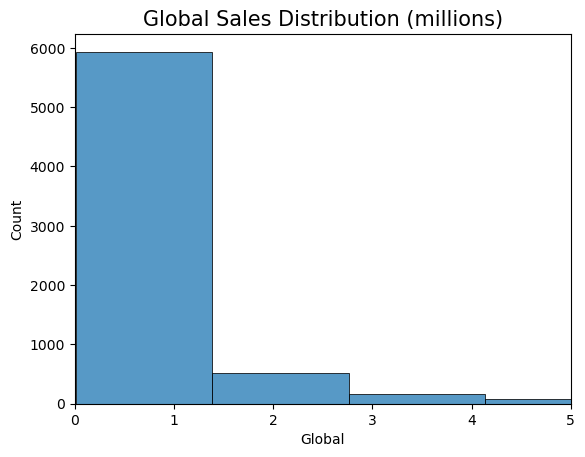

In [340]:
sns.histplot(data=df, x="Global", bins=60)
plt.xlim(0, 5)
plt.title('Global Sales Distribution (millions)', fontsize = 15)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Shooter'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Racing'),
  Text(5, 0, 'Platform'),
  Text(6, 0, 'Misc'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Strategy'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Puzzle')])

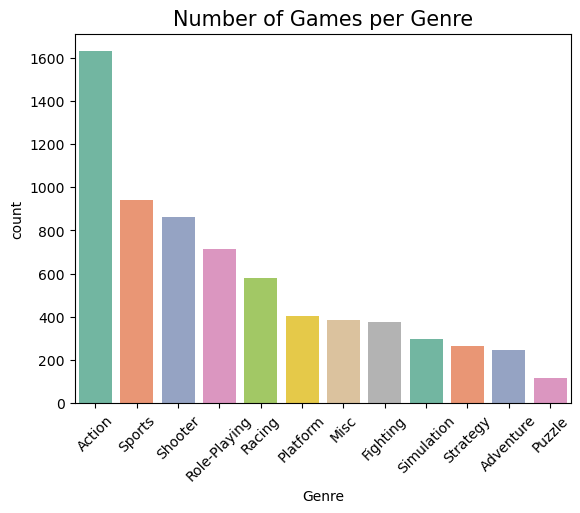

In [397]:
sns.countplot(data=df, x="Genre", order=df["Genre"].value_counts().index, palette="Set2")
plt.title("Number of Games per Genre", fontsize=15)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'PS2'),
  Text(1, 0, 'X360'),
  Text(2, 0, 'PS3'),
  Text(3, 0, 'PC'),
  Text(4, 0, 'XB'),
  Text(5, 0, 'Wii'),
  Text(6, 0, 'DS'),
  Text(7, 0, 'PSP'),
  Text(8, 0, 'GC'),
  Text(9, 0, 'PS4'),
  Text(10, 0, 'GBA'),
  Text(11, 0, 'XOne'),
  Text(12, 0, '3DS'),
  Text(13, 0, 'PS'),
  Text(14, 0, 'PSV'),
  Text(15, 0, 'WiiU'),
  Text(16, 0, 'DC')])

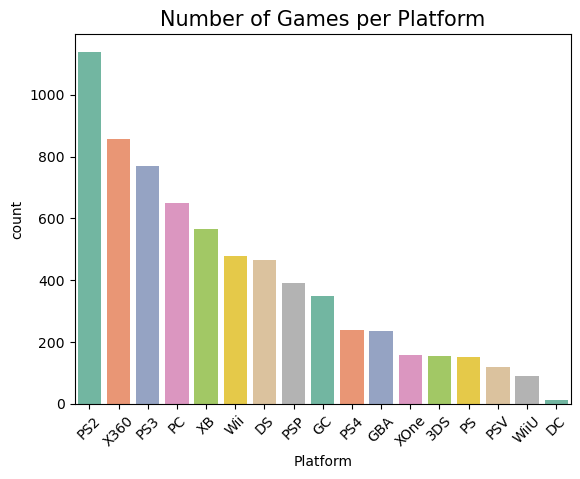

In [400]:
sns.countplot(data=df, x="Platform", order=df["Platform"].value_counts().index, palette="Set2")
plt.title("Number of Games per Platform", fontsize=15)
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Distribution of User vs Critic Scores')

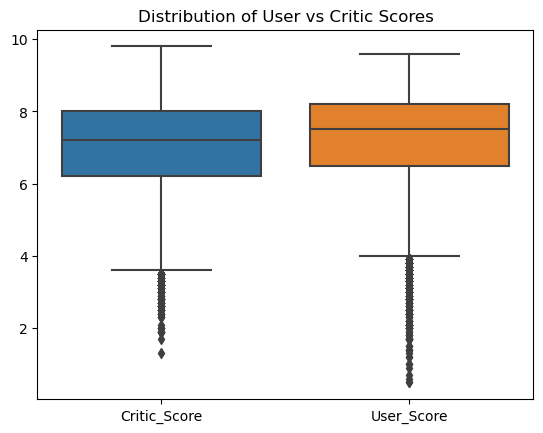

In [402]:
sns.boxplot(data=df[['Critic_Score','User_Score']])
plt.title("Distribution of User vs Critic Scores")



## Data analysis

In [344]:
df_1= df.groupby(['Year'])[['NA', 'EU', 'JP', 'Other']].sum().reset_index()

In [345]:
evolved_sales = pd.melt(df_1, id_vars = 'Year',var_name = 'Region', value_name = 'Sales')

In [346]:
evolved_sales = evolved_sales.replace([np.inf, -np.inf], np.nan).dropna()

Text(-1.75, 1.13, 'Sales across regions over time')

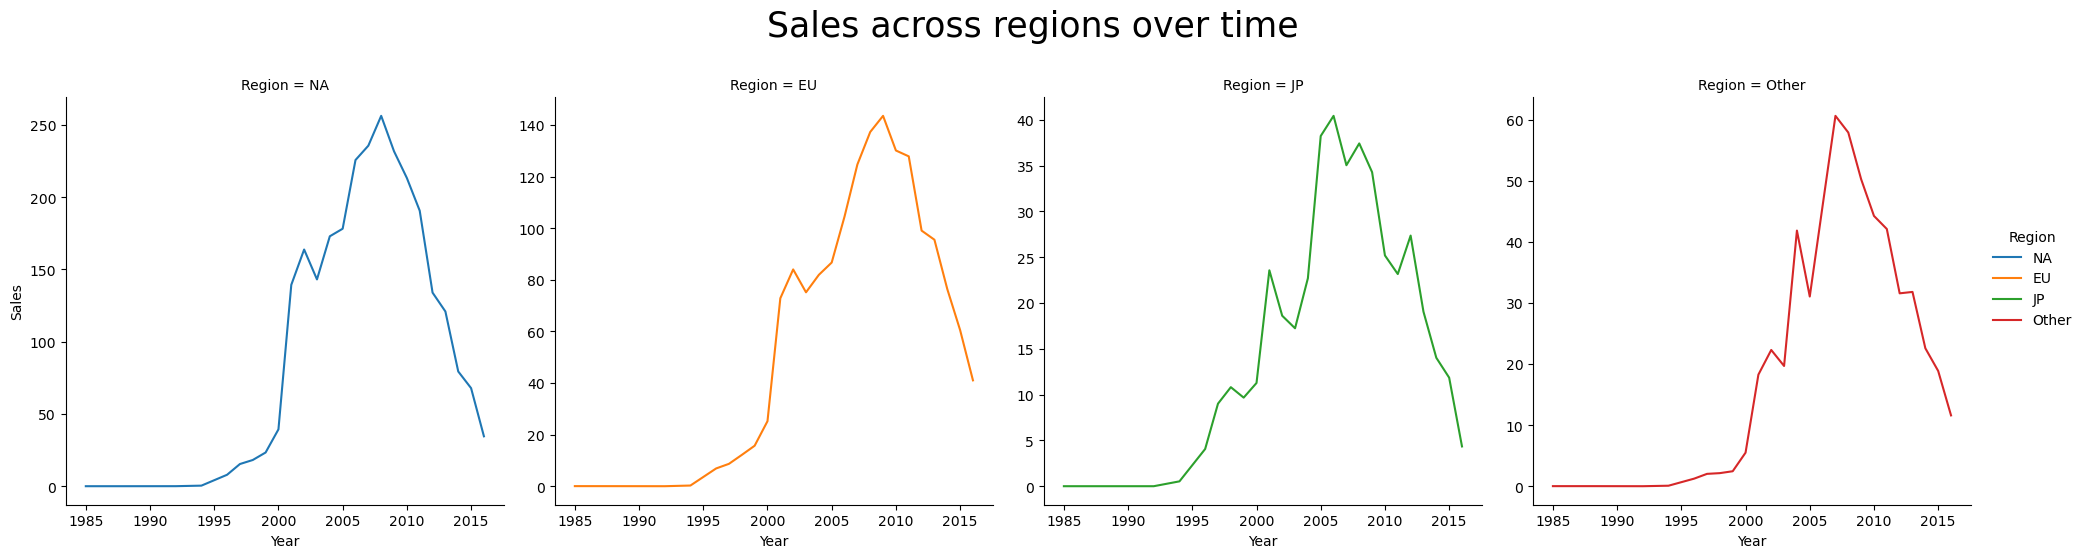

In [347]:
evolved_sales = evolved_sales[np.isfinite(evolved_sales['Year'])]
sns.relplot(x = 'Year', y = 'Sales', data = evolved_sales, hue = 'Region', col = 'Region', kind='line',facet_kws={"sharey": False} )
plt.title('Sales across regions over time', loc = 'Left', fontsize = 25 , x = -1.75, y = 1.13)

In [348]:
genre_sales = df.groupby(['Genre','Year'], observed=True)[['Global']].sum().reset_index()


Text(1, 3.5, 'Sales across genres over time')

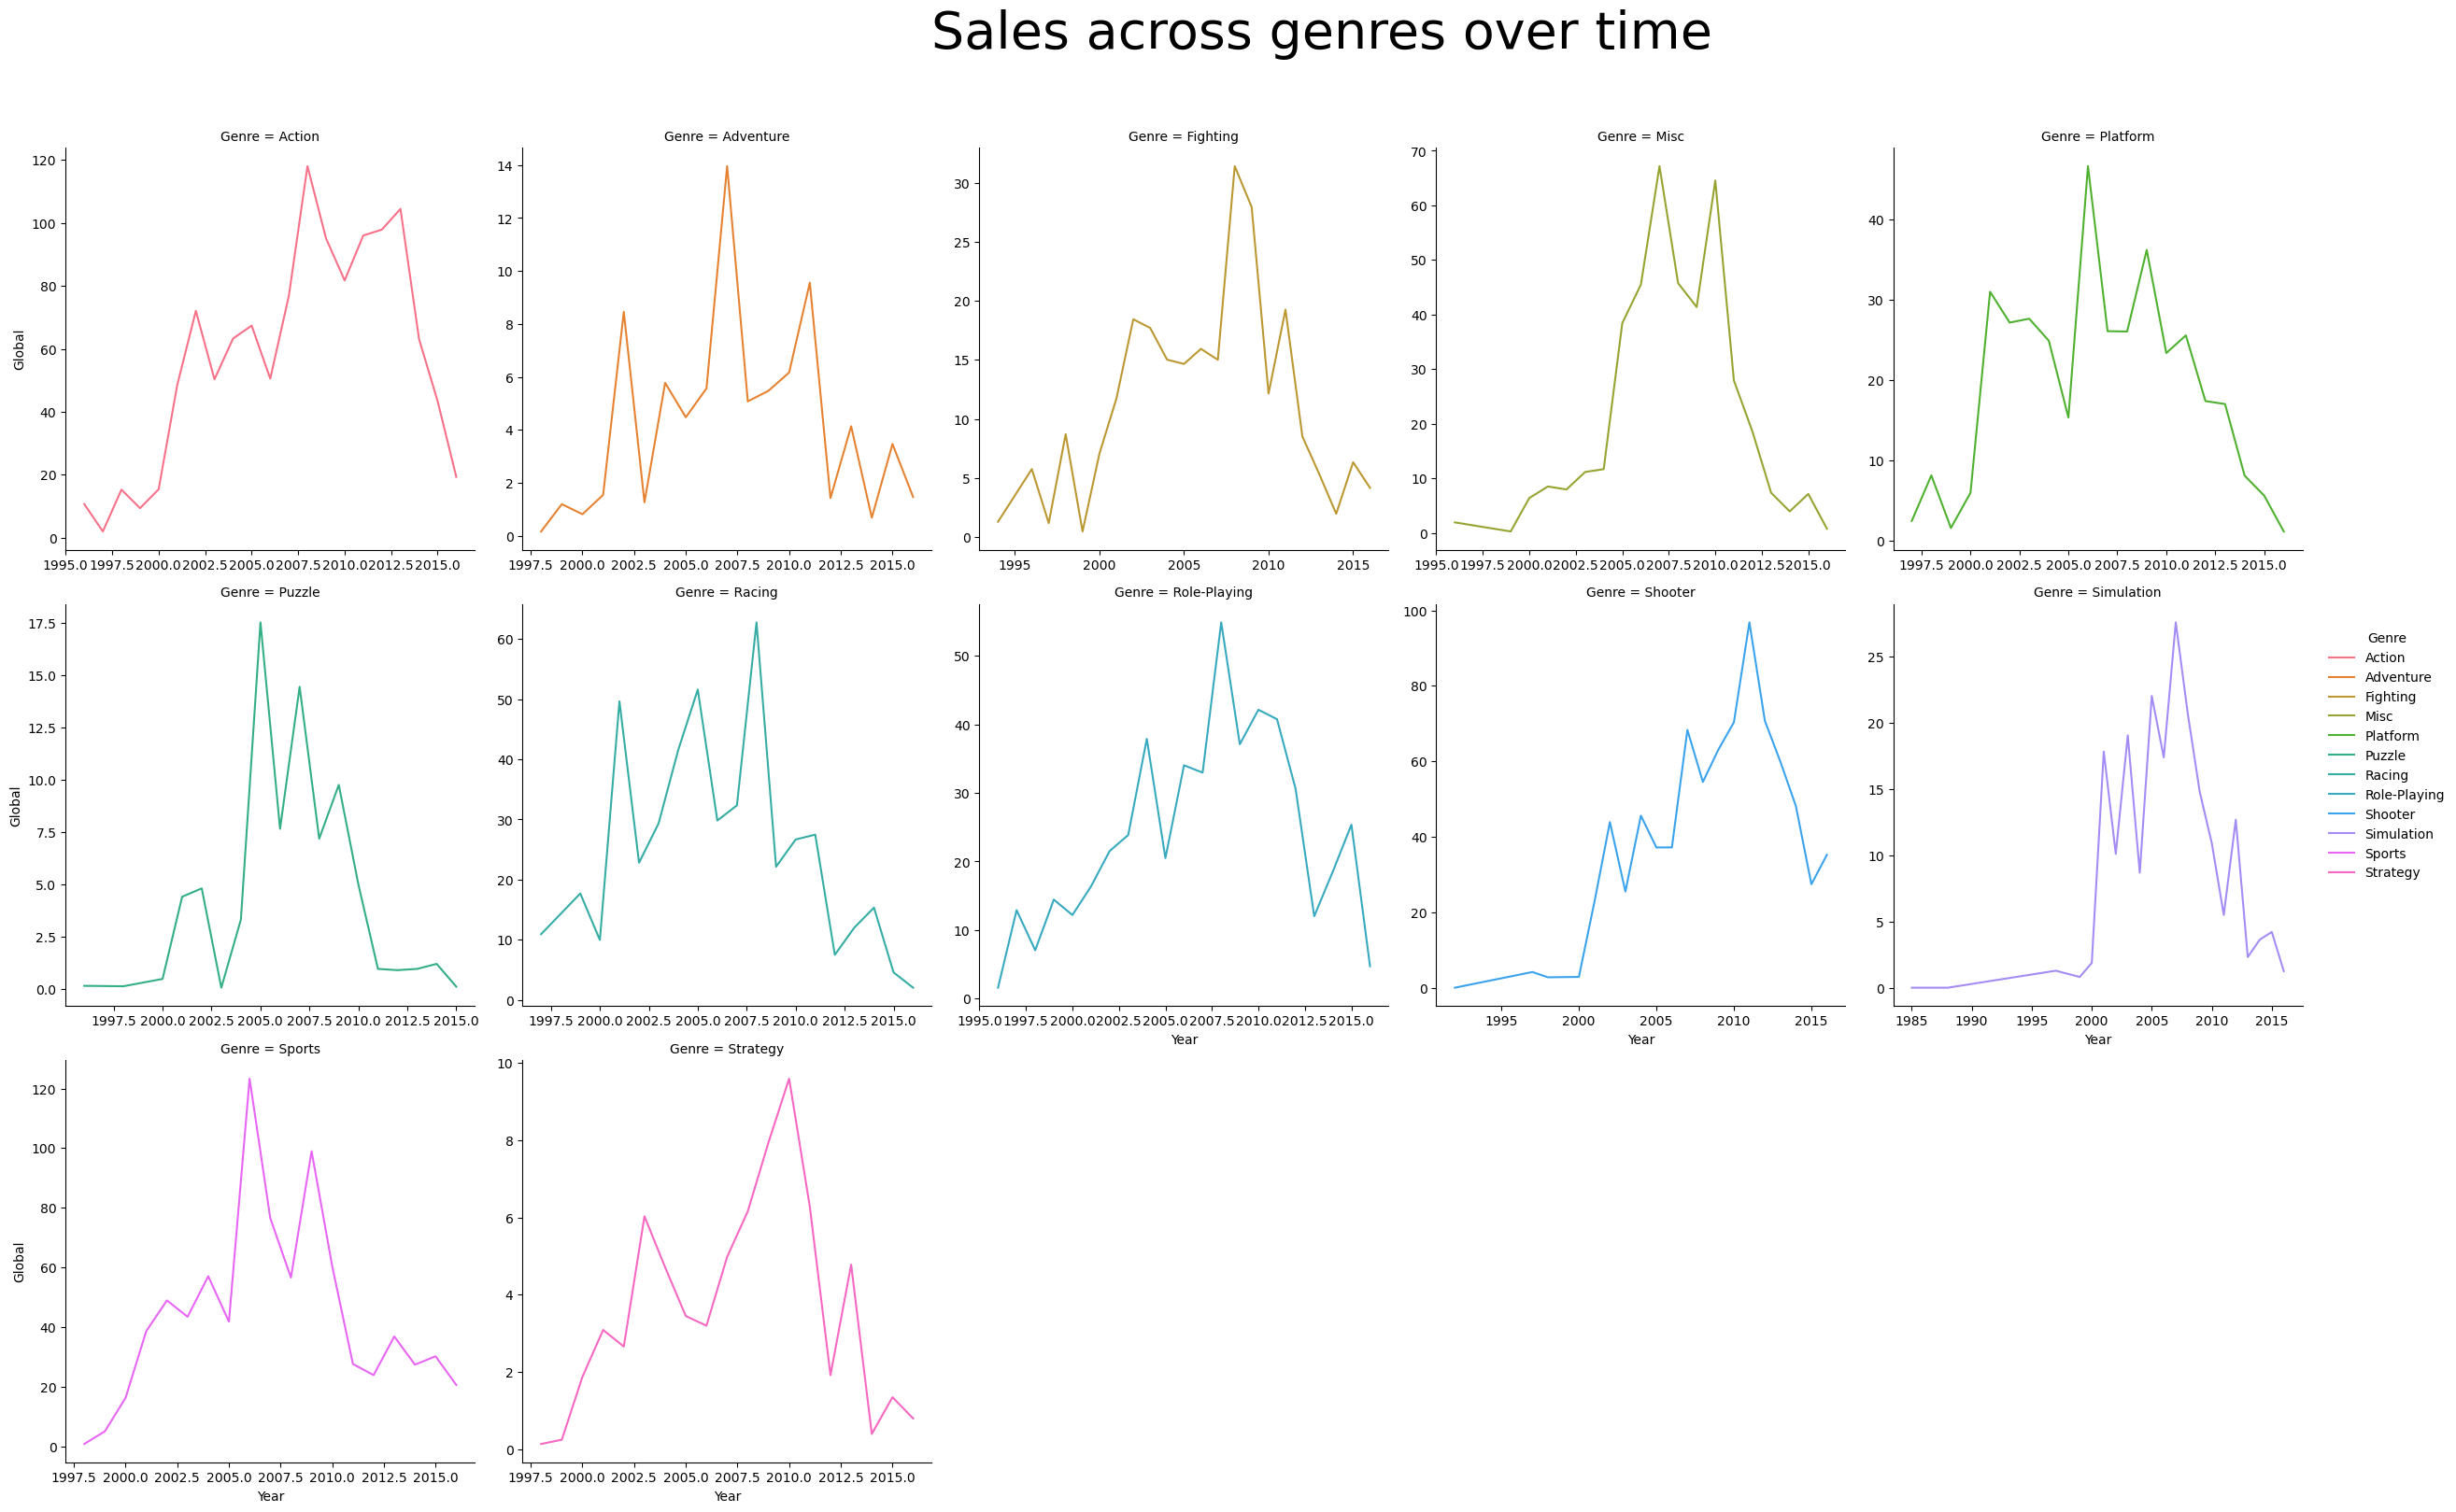

In [349]:
sns.relplot(data=genre_sales,  x="Year", y = 'Global',hue = 'Genre', col = 'Genre',kind = 'line', col_wrap=5,facet_kws={"sharex": False, "sharey": False} )
plt.title('Sales across genres over time', loc = 'Left', fontsize = 40 , x = 1, y = 3.5)

In [350]:
p_1 = df.groupby(['Platform','Year'], observed=True)[['Global']].sum().reset_index()
p_1['Platform'] = p_1['Platform'].astype(str).str.strip()

Text(-2.2, 3.8, 'Sales across platforms over time')

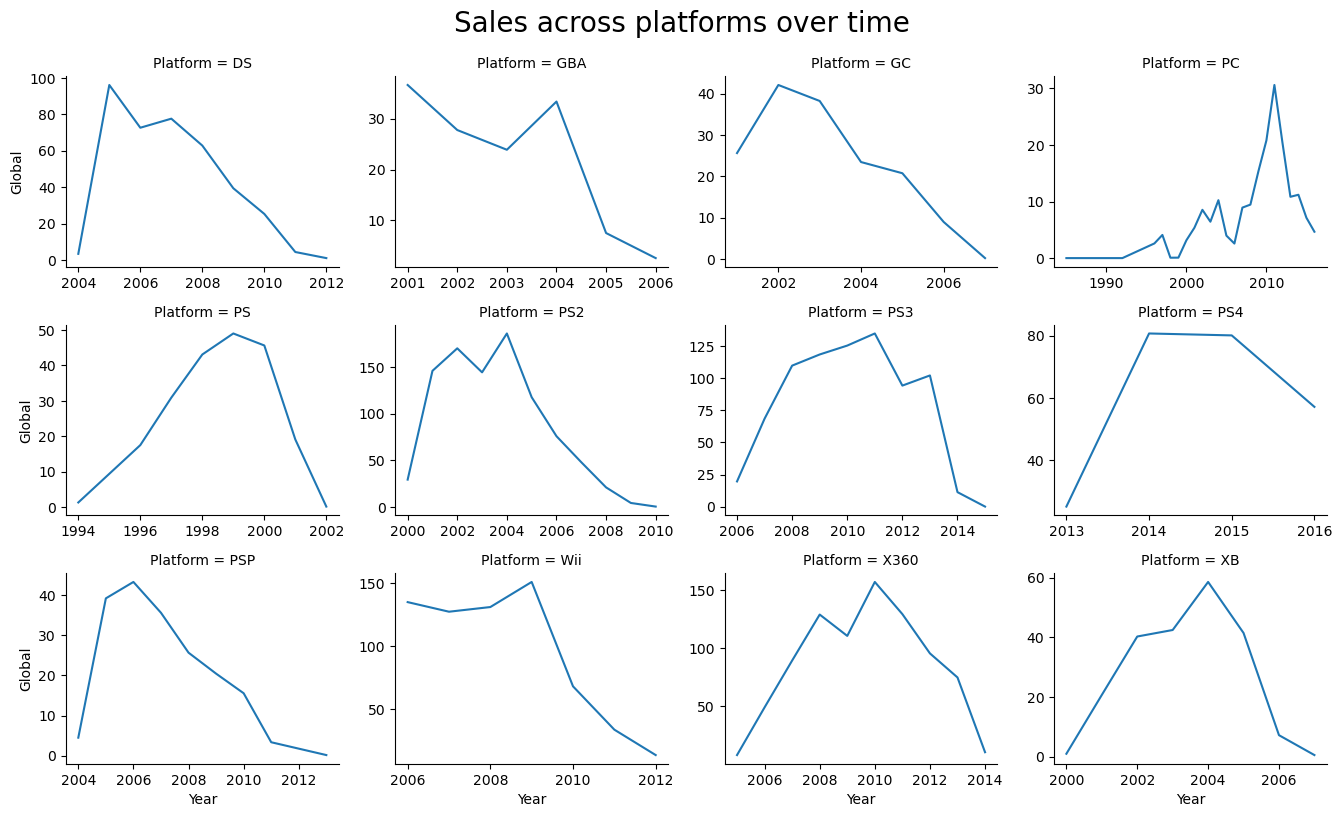

In [351]:
platform_sales = p_1[p_1['Platform'].isin(top_platform)]
sns.relplot(data=platform_sales, x='Year', y='Global', col='Platform', col_wrap=4, kind='line', facet_kws={"sharex": False, "sharey": False}, height=2.6, aspect=1.3)
plt.title('Sales across platforms over time', loc = 'Left', fontsize = 20 , x = -2.2, y = 3.8)

In [352]:
grouped_preferences= df.groupby(['Year','Genre'], observed = True)[['NA', 'EU', 'JP', 'Other']].sum().reset_index()
melted_preferences = pd.melt(grouped_preferences, id_vars = ['Year','Genre'],var_name = 'Region', value_name = 'Sales')

In [353]:
genre = df[['Genre', 'Global']]

In [354]:
grouped_genre = genre.groupby(['Genre'])[['Global']].sum().reset_index()

In [355]:
genre_pref = melted_preferences[melted_preferences['Genre'].isin(top_genre)]

Text(-2.1, 1.1, 'Sales across top genres and regions over time')

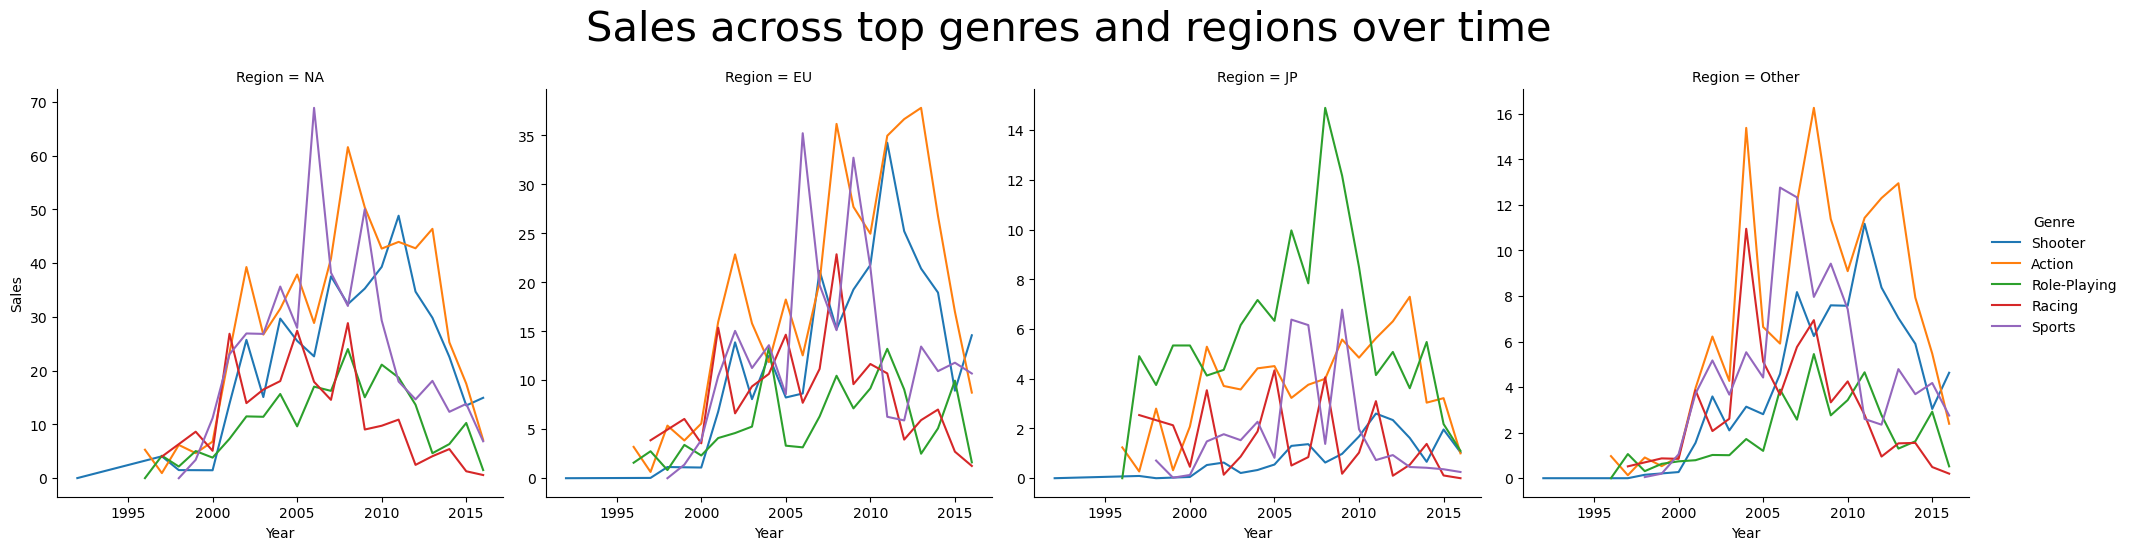

In [356]:
sns.relplot(x = 'Year', y = 'Sales', data = genre_pref, hue = 'Genre', col = 'Region', kind='line', facet_kws={'sharey': False, 'sharex': True})
plt.title('Sales across top genres and regions over time', loc = 'Left', fontsize = 30 , x = -2.1, y = 1.1)

In [357]:
critic = df[['Critic_Score', 'Genre','NA', 'EU', 'JP', 'Other']]

In [358]:
critic = critic.melt( id_vars = ['Critic_Score','Genre'],var_name = 'Region', value_name = 'Sales')

In [359]:
critic = critic[critic['Genre'].isin(top_genre)]

In [360]:
critic= critic.groupby(['Region','Genre','Critic_Score'])[['Sales']].sum().reset_index()
critic = critic[critic['Sales'] > 0]
critic

,Region,Genre,Critic_Score,Sales
3,EU,Action,2.4,0.03
4,EU,Action,2.5,0.02
5,EU,Action,2.6,0.13
6,EU,Action,2.7,0.04
8,EU,Action,2.9,0.02
...,...,...,...,...
1375,Other,Sports,9.3,1.52
1376,Other,Sports,9.4,1.06
1377,Other,Sports,9.5,0.58
1378,Other,Sports,9.7,0.48


In [363]:
user = df[['User_Score', 'Genre','NA', 'EU', 'JP', 'Other']]

In [364]:
user = user.melt( id_vars = ['User_Score','Genre'],var_name = 'Region', value_name = 'Sales')
user

,User_Score,Genre,Region,Sales
0,8.0,Sports,NA,41.36
1,8.3,Racing,NA,15.68
2,8.0,Sports,NA,15.61
3,8.5,Platform,NA,11.28
4,6.6,Misc,NA,13.96
...,...,...,...,...
27291,2.4,Action,Other,0.00
27292,8.8,Fighting,Other,0.00
27293,7.6,Action,Other,0.00
27294,5.8,Shooter,Other,0.00


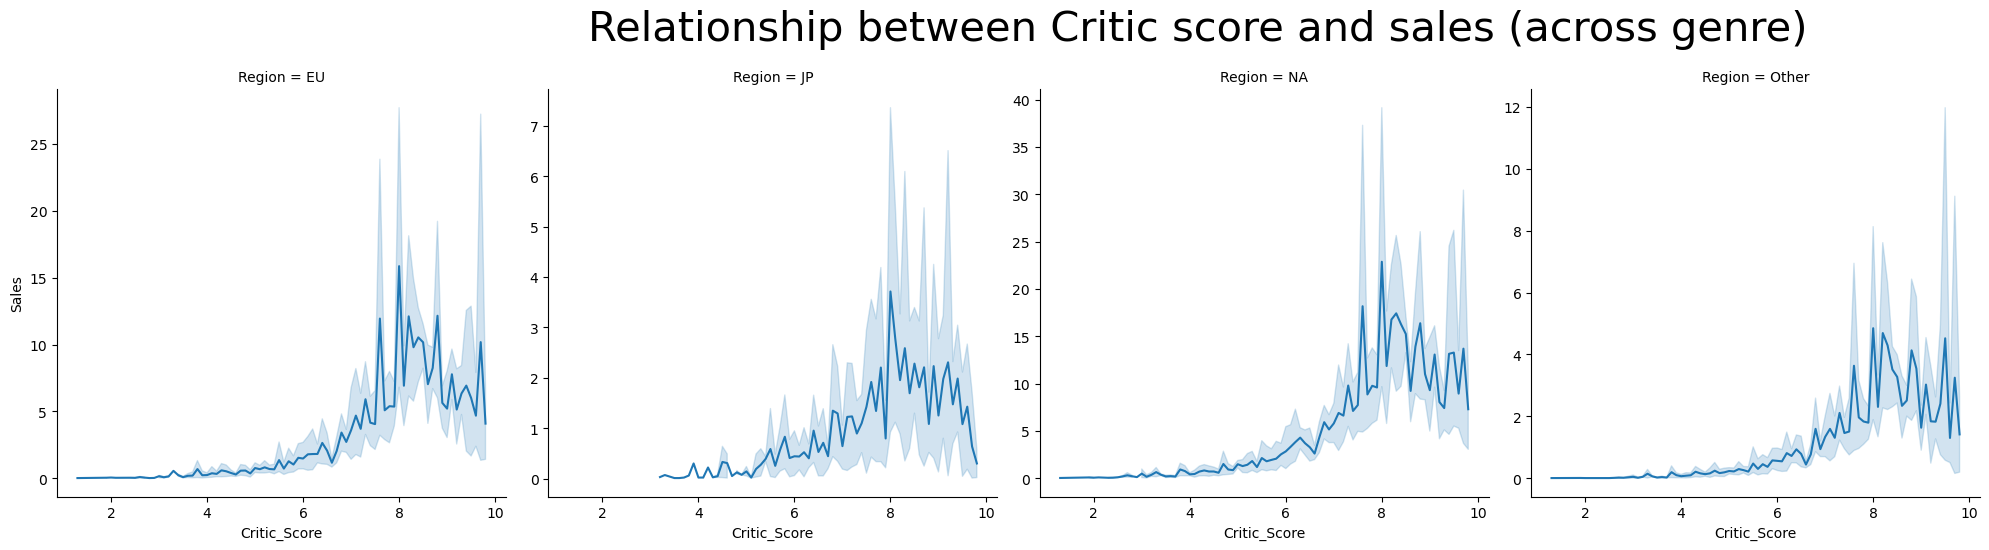

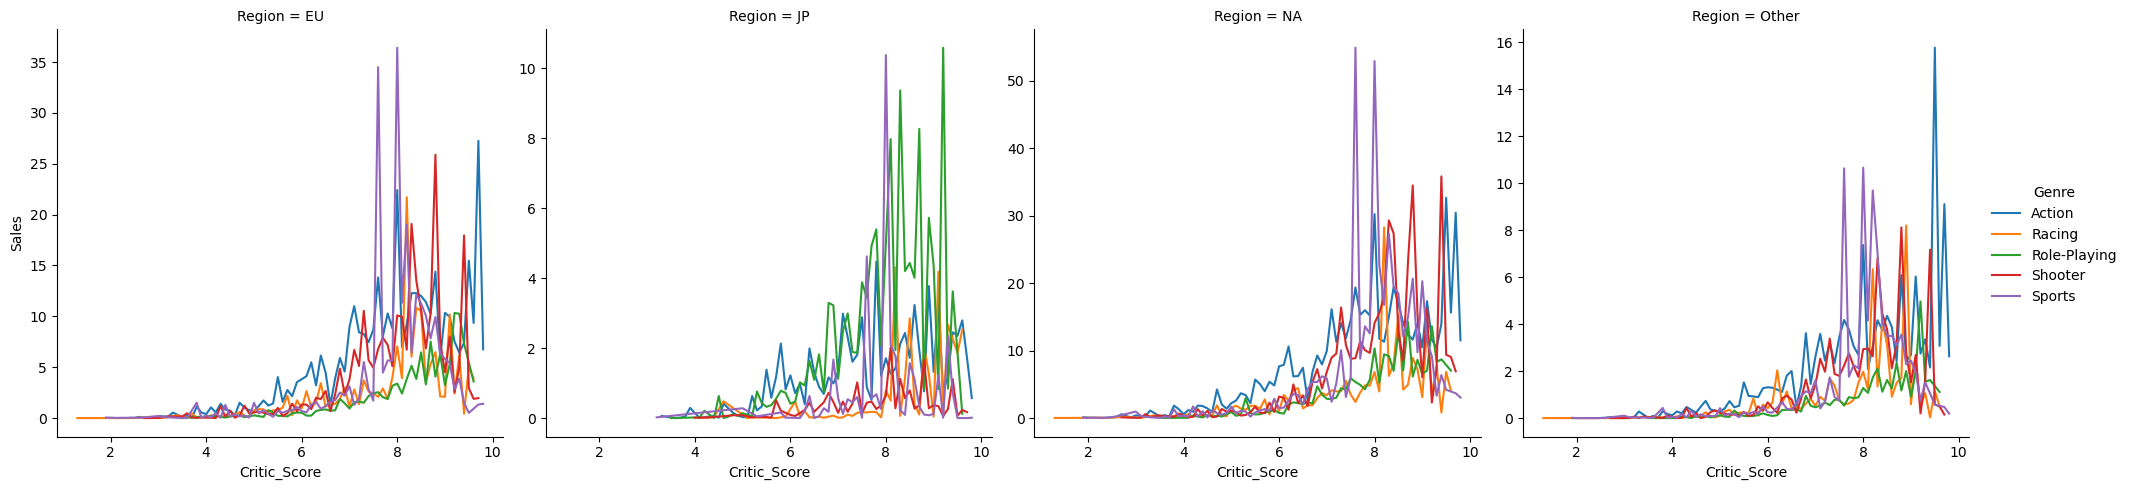

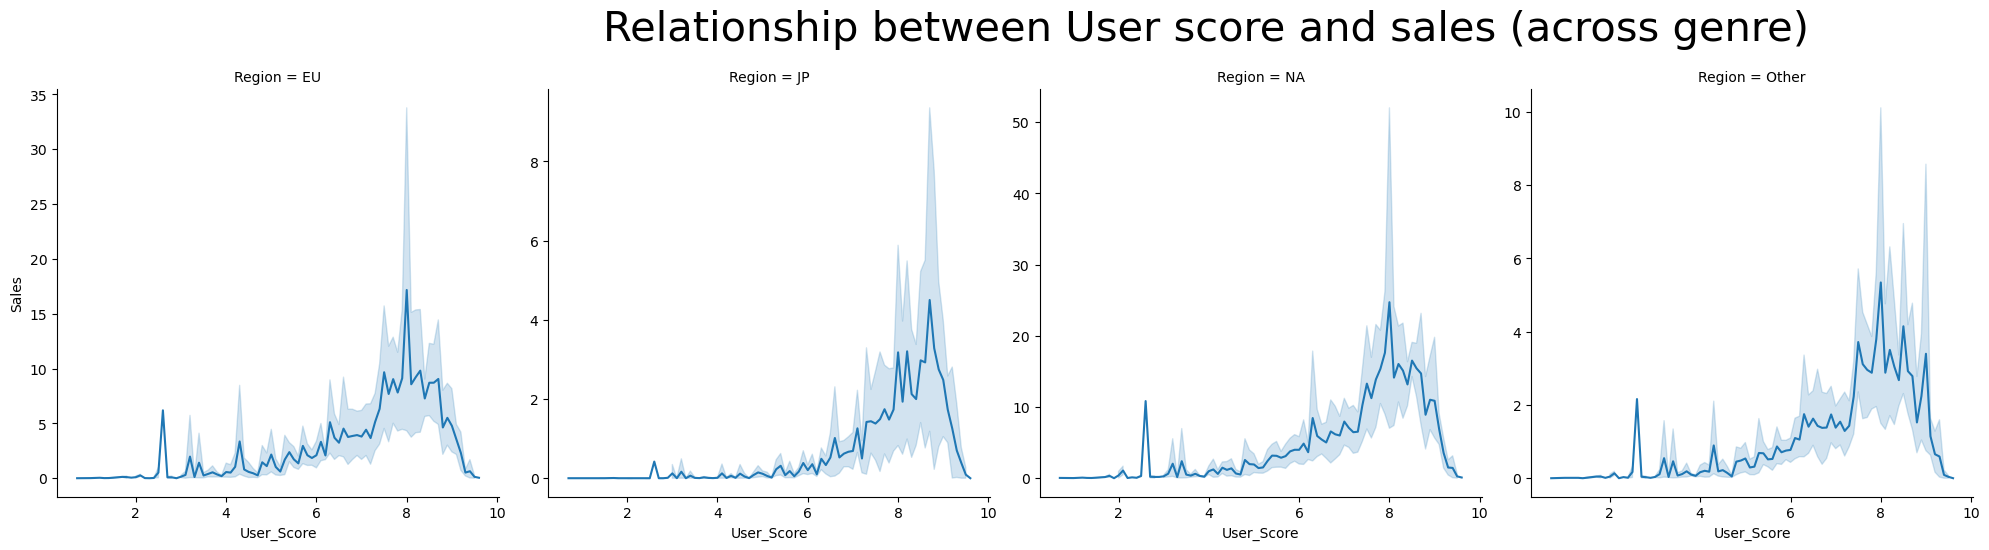

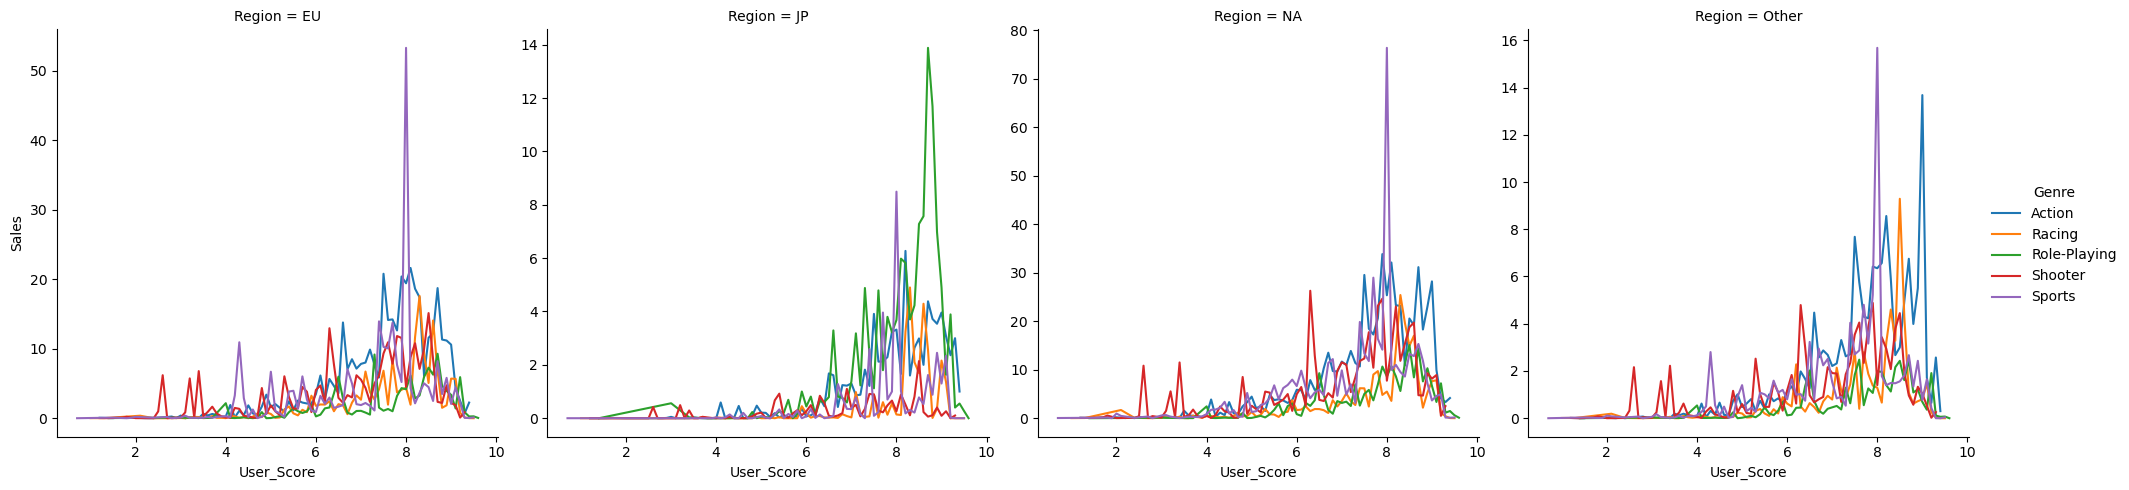

In [388]:
user = user[user['Genre'].isin(top_genre)]
critic = critic[critic['Sales'] > 0]
user_score = user.groupby(['Region','Genre','User_Score'])[['Sales']].sum().reset_index()
critic_score = sns.relplot(data = critic, x = 'Critic_Score', y = 'Sales',col = 'Region', kind = 'line', facet_kws={'sharey': False, 'sharex': True})
plt.title('Relationship between Critic score and sales (across genre)', loc = 'Left', fontsize = 30 , x = -2.1, y = 1.1)
critic_score = sns.relplot(data = critic, x = 'Critic_Score', y = 'Sales', hue = 'Genre',col = 'Region', kind = 'line', facet_kws={'sharey': False, 'sharex': True})

user_score_2 = sns.relplot(data = user_score, x = 'User_Score', y = 'Sales', col = 'Region', kind = 'line', facet_kws={'sharey': False, 'sharex': True})
plt.title('Relationship between User score and sales (across genre)', loc = 'Left', fontsize = 30 , x = -2.1, y = 1.1)
user_score_1 = sns.relplot(data = user_score, x = 'User_Score', y = 'Sales',hue  ='Genre', col = 'Region', kind = 'line', facet_kws={'sharey': False, 'sharex': True})


In [370]:
critic_sales = df[['Year', 'Global', 'Name', 'Critic_Score']]

In [378]:
critic_sales_max = critic_sales[
    critic_sales.groupby('Year')['Global'].transform('max') == critic_sales['Global']
]
critic_sales_max = critic_sales_max[critic_sales_max['Name'].isin(top_games)]
print(critic_sales_max)

    Year  Global                           Name  Critic_Score
0   2006   82.53                     Wii Sports           7.6
2   2008   35.52                 Mario Kart Wii           8.2
3   2009   32.77              Wii Sports Resort           8.0
11  2005   23.21                  Mario Kart DS           9.1
13  2007   22.70                        Wii Fit           8.0
14  2010   21.81             Kinect Adventures!           6.1
16  2013   21.04             Grand Theft Auto V           9.7
17  2004   20.81  Grand Theft Auto: San Andreas           9.5
24  2002   16.15    Grand Theft Auto: Vice City           9.5
28  2001   14.98         Gran Turismo 3: A-Spec           9.5
42  2014   12.61             Grand Theft Auto V           9.7


In [379]:
user_sales = df[['Year', 'Global', 'Name', 'User_Score']]

In [380]:
user_sales_max = user_sales[
    user_sales.groupby('Year')['Global'].transform('max') == user_sales['Global']
]

user_sales_max = user_sales_max[user_sales_max['User_Score'].notna()]

In [381]:
top_games = user_sales_max[['Name', 'Global']].sort_values(by = 'Global', ascending = False).head(10)
top_games = top_games['Name'].tolist()

In [387]:
user_sales_max = user_sales_max[user_sales_max['Name'].isin(top_games)]
user_sales_max

,Year,Global,Name,User_Score
0,2006,82.53,Wii Sports,8.0
2,2008,35.52,Mario Kart Wii,8.3
3,2009,32.77,Wii Sports Resort,8.0
11,2005,23.21,Mario Kart DS,8.6
13,2007,22.70,Wii Fit,7.7
14,2010,21.81,Kinect Adventures!,6.3
16,2013,21.04,Grand Theft Auto V,8.2
17,2004,20.81,Grand Theft Auto: San Andreas,9.0
24,2002,16.15,Grand Theft Auto: Vice City,8.7
28,2001,14.98,Gran Turismo 3: A-Spec,8.4


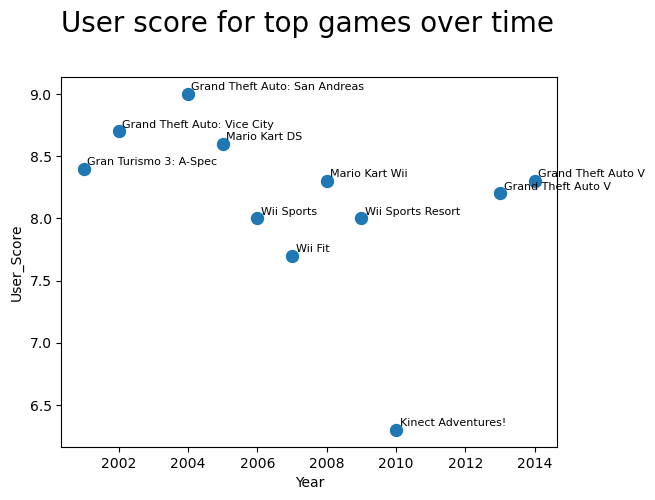

In [385]:
plot_df = user_sales_max.sort_values('Year')
ax = sns.scatterplot(data=plot_df, x='Year', y='User_Score', s=110, color='tab:blue')
plt.title('User score for top games over time', loc = 'Left', fontsize = 20 , x = 0, y = 1.1)
for _, r in plot_df.iterrows():
    ax.text(r['Year']+0.1, r['User_Score']+0.03, r['Name'], fontsize=8)

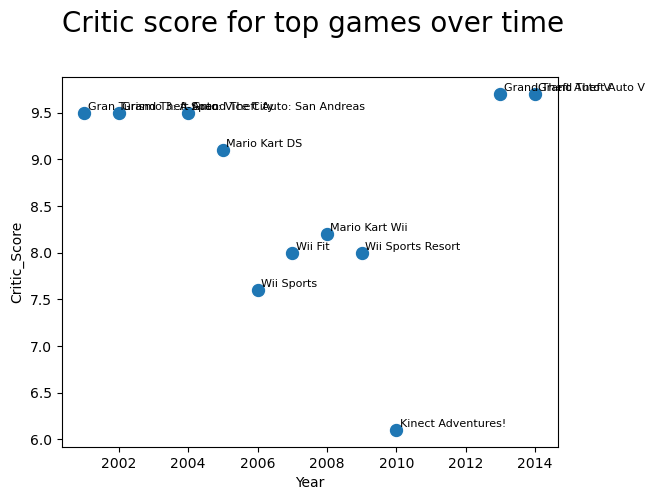

In [386]:
plot_df_1 = critic_sales_max.sort_values('Year')
ax = sns.scatterplot(data=plot_df_1, x='Year', y='Critic_Score', s=110, color='tab:blue')
plt.title('Critic score for top games over time', loc = 'Left', fontsize = 20 , x = 0, y = 1.1)
for _, r in plot_df_1.iterrows():
    ax.text(r['Year']+0.1, r['Critic_Score']+0.03, r['Name'], fontsize=8)